#FAKE NEWS CLASSIFICATION using ml models and nlp approach

In [5]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix , precision_score, classification_report
import re #replace
import string

In [6]:
#importing datasets
df_fake = pd.read_csv('/content/Fake.csv')
df_true = pd.read_csv('/content/True.csv')

In [7]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [8]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [9]:
#inserting a column named "class" for both the datasets
df_true['class'] = 1
df_fake['class'] = 0 #0->fake and 1->true

In [10]:
df_true.sample(5)

,title,text,subject,date,class
1378,"In meeting with military, Trump talks of 'calm...",WASHINGTON (Reuters) - After discussing Iran a...,politicsNews,"October 6, 2017",1
247,Aide tries to refocus tax debate after Trump's...,WASHINGTON (Reuters) - President Donald Trump’...,politicsNews,"December 8, 2017",1
8324,Senators press Mylan on 'exorbitantly expensiv...,WASHINGTON (Reuters) - Democrat Elizabeth Warr...,politicsNews,"August 30, 2016",1
11984,German defense minister says troop withdrawal ...,"MAZAR-I-SHARIF, Afghanistan (Reuters) - German...",worldnews,"December 18, 2017",1
5164,Trump says has 'total confidence' in Attorney ...,"NEWPORT NEWS, Va. (Reuters) - President Donald...",politicsNews,"March 2, 2017",1


In [11]:
df_fake.sample(5)

,title,text,subject,date,class
6274,Trump Claims Hillary Was Involved In Disappea...,Giddy with the news that an Egyptian commercia...,News,"May 20, 2016",0
13632,HILLARY SHARES PRO-ILLEGAL MANIFESTO: Plans To...,"To hell with the common sense voter, Hillary b...",politics,"Jun 25, 2016",0
695,GOP Congress Just Delivered Trump The Biggest...,If there s one thing Donald Trump fears the mo...,News,"August 1, 2017",0
8732,Karma’s Latest Victim: Birthers Drag Ted Cruz...,"They say karma s a bi*ch, and it continues to ...",News,"January 15, 2016",0
11926,"IS OBAMA PUNISHING Fiat-Chrysler For 2,000 US ...",We don t know whether the charges against Fiat...,politics,"Jan 12, 2017",0


In [12]:
df_true.shape, df_fake.shape #data is somewhat balanced

((21417, 5), (23481, 5))

In [13]:
# Removing last 10 rows for manual testing
df_fake_manual_testing = df_fake.tail(10)
for i in range(23480,23470,-1):
    df_fake.drop([i], axis = 0, inplace = True)


df_true_manual_testing = df_true.tail(10)
for i in range(21416,21406,-1):
    df_true.drop([i], axis = 0, inplace = True)

In [14]:
df_fake.shape, df_true.shape

((23471, 5), (21407, 5))

In [15]:
df_fake_manual_testing.head()

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0


In [16]:
df_true_manual_testing.head()

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1


In [17]:
df_test = pd.concat([df_fake_manual_testing, df_true_manual_testing], axis = 0)
df_test.to_csv("test.csv", index = False)

In [18]:
df_test.sample(5)

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [19]:
#now we are merging both true and fake dataframe
df_merge = pd.concat([df_fake, df_true], axis = 0)
df_merge.sample(5)

,title,text,subject,date,class
12030,SHERIFF CLARKE Destroys Idiocy Of Gun Control ...,As usual Milwaukee s outspoken Sheriff David C...,politics,"Dec 30, 2016",0
7591,Mexico's border trade capital craves Clinton w...,"NUEVO LAREDO, Mexico (Reuters) - Glafiro Monte...",politicsNews,"November 3, 2016",1
809,Families of Japanese abducted by North Korea m...,TOKYO (Reuters) - Family members of Japanese a...,politicsNews,"November 6, 2017",1
20770,SHAMEFUL! AIR FORCE VETERAN Ousted From Collea...,OBAMA S AMERICA: Why do you think people are ...,left-news,"Apr 6, 2016",0
10526,"Trump, anti-Trump forces start Florida ad battle",(Reuters) - Donald Trump’s presidential campai...,politicsNews,"March 4, 2016",1


In [20]:
df_merge.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [21]:
df_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [22]:
#droping not required columns like subject ,date , title
df = df_merge.drop(['title', 'subject', 'date'], axis = 1)

In [23]:
df.head()

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44878 entries, 0 to 21406
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    44878 non-null  object
 1   class   44878 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.0+ MB


In [25]:
df.isnull().sum()

text     0
class    0
dtype: int64

In [26]:
#shuffling the dataframe df
df = df.sample(frac = 1)

In [27]:
df.head()

,text,class
5706,"The Supreme Court just decided that no, not ev...",0
14843,Aden (Reuters) - An air raid by the Saudi-led ...,1
17985,The double standard in our judicial system tod...,0
3574,WASHINGTON (Reuters) - U.S. Commerce Secretary...,1
31,WASHINGTON (Reuters) - A summer spat between P...,1


In [28]:
#reseting the index
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True) #along column axis

In [29]:
df.head()

,text,class
0,"The Supreme Court just decided that no, not ev...",0
1,Aden (Reuters) - An air raid by the Saudi-led ...,1
2,The double standard in our judicial system tod...,0
3,WASHINGTON (Reuters) - U.S. Commerce Secretary...,1
4,WASHINGTON (Reuters) - A summer spat between P...,1


In [30]:
#dataprocessing for the text
import nltk
nltk.download('all')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [31]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [32]:

from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Remove newline characters
    text = re.sub(r'\n', '', text)

    # Tokenize text
    tokens = word_tokenize(text)

    # Initialize stemmer
    ps = PorterStemmer()

    # Filter out non-alphanumeric tokens, remove stopwords, and apply stemming
    processed_tokens = []
    for token in tokens:
        if token.isalnum() and token not in string.punctuation and token not in stopwords.words('english'):
            processed_tokens.append(ps.stem(token))

    # Join processed tokens back into a string
    processed_text = ' '.join(processed_tokens)

    return processed_text

In [33]:
df['transformed_text'] = df['text'].apply(preprocess_text)

In [34]:
df.head()

,text,class,transformed_text
0,"The Supreme Court just decided that no, not ev...",0,suprem court decid everyon access firearm upho...
1,Aden (Reuters) - An air raid by the Saudi-led ...,1,aden reuter air raid militari coalit put yemen...
2,The double standard in our judicial system tod...,0,doubl standard judici system today relat prote...
3,WASHINGTON (Reuters) - U.S. Commerce Secretary...,1,washington reuter commerc secretari wilbur ros...
4,WASHINGTON (Reuters) - A summer spat between P...,1,washington reuter summer spat presid donald tr...


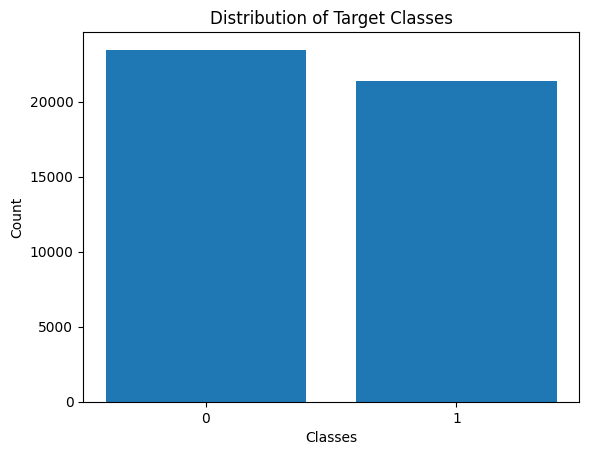

In [35]:
# Get value counts of the 'target' column
value_counts = df['class'].value_counts()

# Create bar graph
plt.bar(value_counts.index, value_counts.values)

# Add title and labels
plt.title('Distribution of Target Classes')
plt.xlabel('Classes')
plt.ylabel('Count')
# Set x-axis ticks to display only 0 and 1
plt.xticks([0, 1])
# Show plot
plt.show()

In [36]:
#from the above graph the data is somewhat balance


#model building

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features = 5000)


In [38]:
x = tfidf.fit_transform(df['transformed_text']).toarray()

In [39]:
x.shape, x

((44878, 5000),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]))

In [40]:
y = df['class'].values

In [41]:
y

array([0, 1, 0, ..., 1, 1, 1])

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [43]:
x_train.shape, y_train.shape

((35902, 5000), (35902,))

In [44]:
x_test.shape, y_test.shape

((8976, 5000), (8976,))

In [45]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [46]:
y_pred1 = lr.predict(x_test)
y_pred_tr1 = lr.predict(x_train)

In [48]:
print("training accuracy : ", accuracy_score(y_train, y_pred_tr1))
print("testing accuracy : ", accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

training accuracy :  0.9895548994484987
testing accuracy :  0.9869652406417112
[[4730   75]
 [  42 4129]]
0.9821598477640342
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4805
           1       0.98      0.99      0.99      4171

    accuracy                           0.99      8976
   macro avg       0.99      0.99      0.99      8976
weighted avg       0.99      0.99      0.99      8976



In [49]:
#decision tree classification
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth = 5)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [50]:
y_pred2 = lr.predict(x_test)
y_pred_tr2 = lr.predict(x_train)

print("training accuracy : ", accuracy_score(y_train, y_pred_tr2))
print("testing accuracy : ", accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

training accuracy :  0.9895548994484987
testing accuracy :  0.9869652406417112
[[4730   75]
 [  42 4129]]
0.9821598477640342
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4805
           1       0.98      0.99      0.99      4171

    accuracy                           0.99      8976
   macro avg       0.99      0.99      0.99      8976
weighted avg       0.99      0.99      0.99      8976



In [51]:
#random forest classifier

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 10, random_state = 2)
rfc.fit(x_train, y_train)


RandomForestClassifier(n_estimators=10, random_state=2)

In [52]:
y_pred3 = lr.predict(x_test)
y_pred_tr3 = lr.predict(x_train)

print("training accuracy : ", accuracy_score(y_train, y_pred_tr3))
print("testing accuracy : ", accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))
print(classification_report(y_test, y_pred3))

training accuracy :  0.9895548994484987
testing accuracy :  0.9869652406417112
[[4730   75]
 [  42 4129]]
0.9821598477640342
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4805
           1       0.98      0.99      0.99      4171

    accuracy                           0.99      8976
   macro avg       0.99      0.99      0.99      8976
weighted avg       0.99      0.99      0.99      8976



In [ ]:
#svm classifier

from sklearn.svm import SVC
svc = SVC(kernel = 'sigmoid', gamma = 1.0)
svc.fit(x_train, y_train)

In [ ]:
y_pred4 = lr.predict(x_test)
y_pred_tr4 = lr.predict(x_train)

print("training accuracy : ", accuracy_score(y_train, y_pred_tr4))
print("testing accuracy : ", accuracy_score(y_test, y_pred4))
print(confusion_matrix(y_test, y_pred4))
print(precision_score(y_test, y_pred4))
print(classification_report(y_test, y_pred4))